In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("OnlineRetail.xlsx")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

In [5]:
df = df.dropna()
 
df = df.reset_index(drop=True)

In [6]:
df = df.drop("StockCode",axis=1)

In [21]:
numcols = ['Quantity', 'UnitPrice'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[numcols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[numcols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[numcols] < (Q1 - 1.5 * IQR)) | (df[numcols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]
df = df.reset_index(drop=True)

In [9]:
df["InvoiceNo"] = df["InvoiceNo"].astype('str')
df["InvoiceNo"] = LE().fit_transform(df["InvoiceNo"])
df["Description"] = df["Description"].astype('str')
df["Description"] = LE().fit_transform(df["Description"])
df["InvoiceDate"] = df["InvoiceDate"].astype('str')
df["InvoiceDate"] = LE().fit_transform(df["InvoiceDate"])
df["Country"] = df["Country"].astype('str')
df["Country"] = LE().fit_transform(df["Country"])
df["CustomerID"] = df["CustomerID"].astype('str')
df["CustomerID"] = LE().fit_transform(df["CustomerID"])


In [14]:
df["Quantity"] = SS().fit_transform(df[['Quantity']]).flatten()
df['UnitPrice'] = SS().fit_transform(df[['UnitPrice']]).flatten()

In [22]:

df.head(15)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3432,-0.185995,0,0.225224,3916,35
1,0,3440,-0.185995,0,0.767699,3916,35
2,0,784,0.104668,0,0.354385,3916,35
3,0,1673,-0.185995,0,0.767699,3916,35
4,0,2568,-0.185995,0,0.767699,3916,35
5,0,1322,-0.185995,0,1.323091,3916,35
6,1,1434,-0.185995,1,-0.226839,3916,35
7,1,1431,-0.185995,1,-0.226839,3916,35
8,2,2419,-0.185995,2,-0.065388,522,35
9,2,2420,-0.185995,2,-0.065388,522,35


C:\Users\anaal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


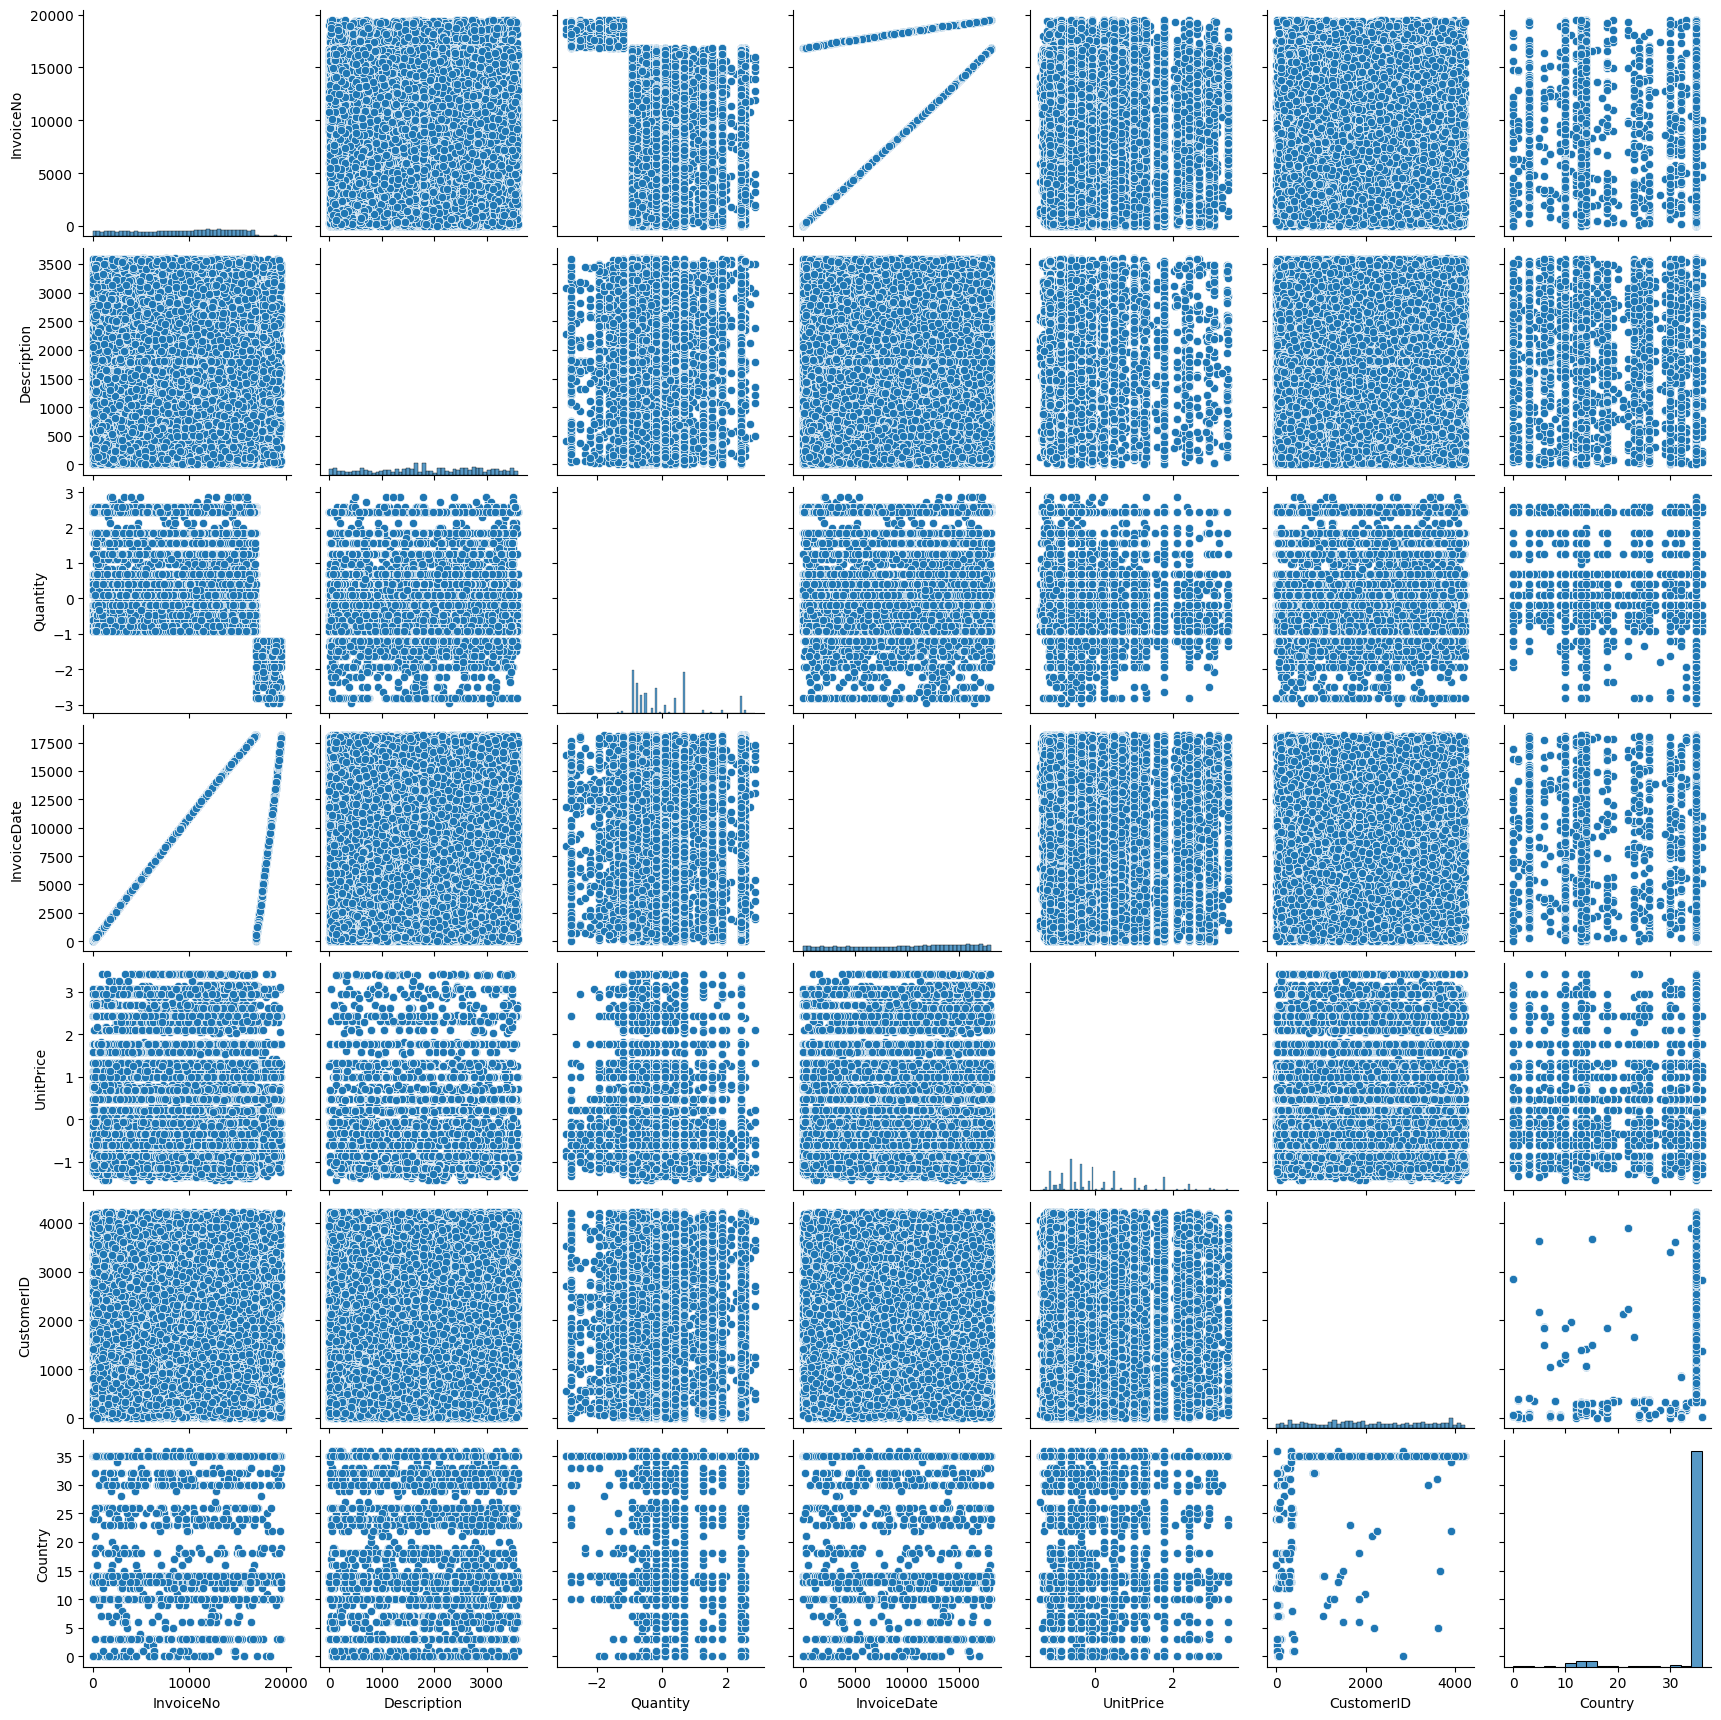

In [16]:
sample = df.sample(frac = 0.25)
sample.reset_index()
sns.pairplot(sample)
plt.show()

C:\Users\anaal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

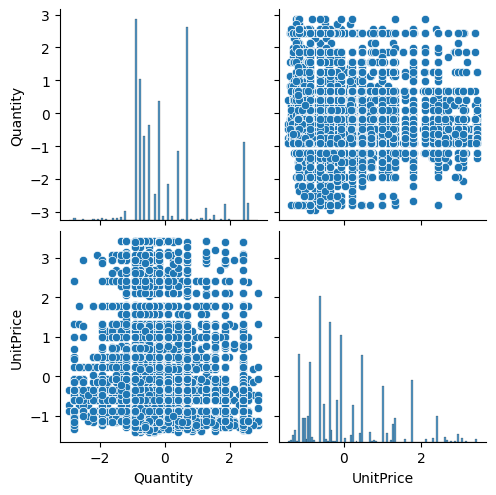

In [23]:
plt.figure()
sns.pairplot(sample,vars=["Quantity","UnitPrice"])
plt.show()

In [24]:
km = KMeans(n_clusters=7)
preds = km.fit_predict(sample)

C:\Users\anaal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
print(preds)

[0 4 0 ... 0 4 2]


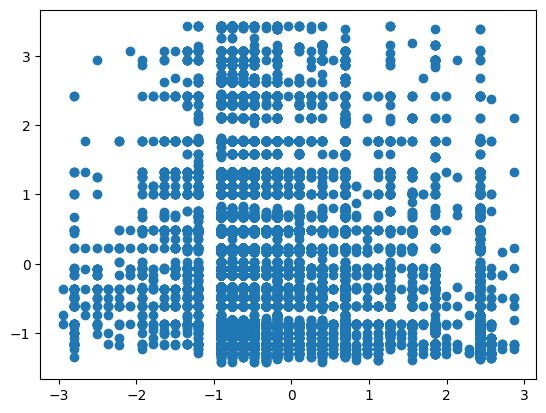

In [27]:
plt.scatter(sample["Quantity"],sample["UnitPrice"])

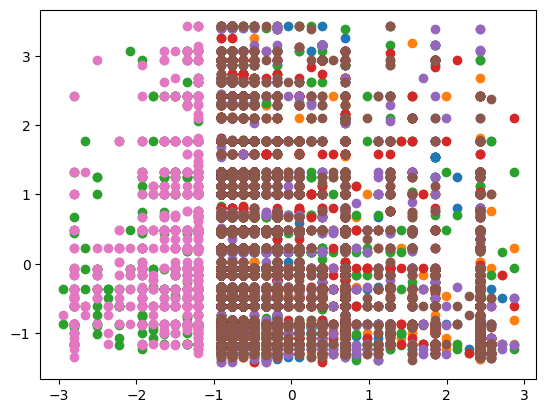

In [29]:
for i in range(7):
    plt.scatter(sample.iloc[preds==i,2], sample.iloc[preds==i,4])

In [33]:
agg = AgglomerativeClustering(n_clusters=7)
s = sample.sample(frac=0.2)
predictions = agg.fit_predict(s)

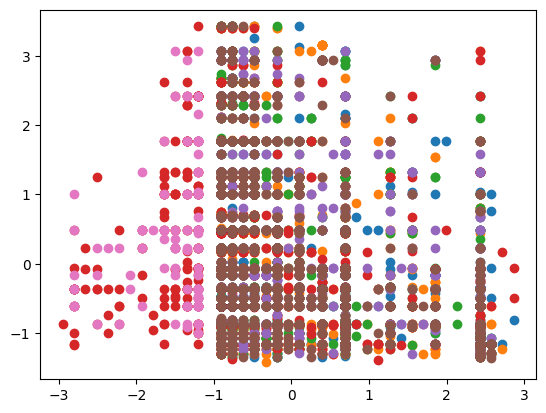

In [34]:
for i in range(7):
    plt.scatter(s.iloc[predictions==i,2], s.iloc[predictions==i,4])

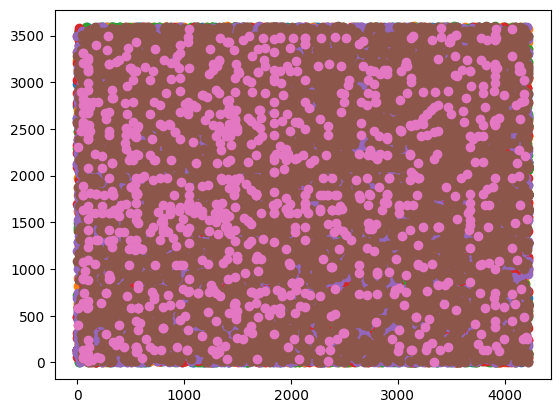

In [36]:
for i in range(7):
    plt.scatter(sample.iloc[preds==i,5], sample.iloc[preds==i,1])


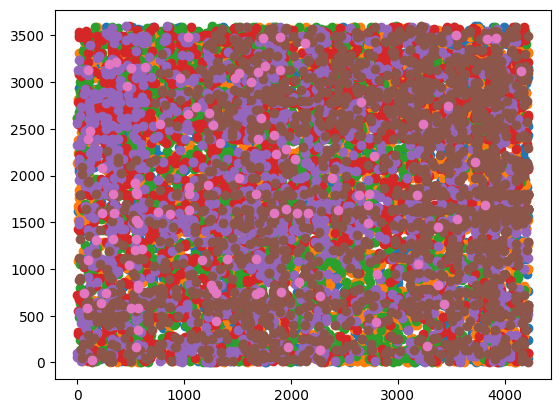

In [37]:
for i in range(7):
    plt.scatter(s.iloc[predictions==i,5], s.iloc[predictions==i,1])

[[-6.85334201e-01 -3.59148770e-03  7.06801398e-06 -7.28219815e-01
   3.46928111e-06  1.90183589e-04 -5.85204487e-06]
 [ 6.94654100e-02  3.70170690e-03  9.77911829e-05 -6.56527240e-02
   1.08202790e-05 -9.95412710e-01 -2.02490480e-03]
 [ 7.21324727e-01 -1.03035339e-01 -2.00569843e-04 -6.78312287e-01
   4.19294361e-05  9.46928724e-02  1.24811420e-04]]
[0.93616327 0.02646959 0.01920606]
['pca0' 'pca1' 'pca2']
               pca0         pca1        pca2  Preds
0      -3054.593062  1246.487933 -342.250203      0
1      -4267.218180  1804.358167 -416.886053      4
2      -1759.458475  -100.831003 -266.792342      0
3      13209.679357   297.678758  -31.068134      3
4      11718.777710 -1459.960644  116.926685      3
...             ...          ...         ...    ...
86093  -5998.252883  1936.069508 -568.873354      4
86094  12830.767468   509.796162   80.105032      3
86095    -48.034005   921.290705 -411.513555      0
86096  -4408.654372  -715.308559  -27.438041      4
86097 -10061.61539

C:\Users\anaal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


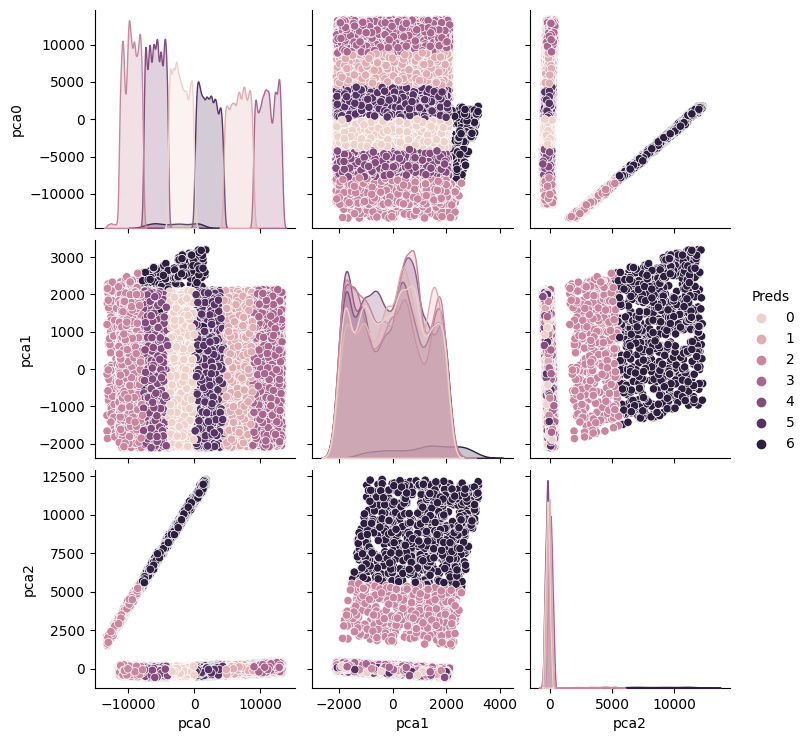

In [44]:
DRed = PCA(n_components=3)
XPCA= DRed.fit_transform(sample)
print(DRed.components_)
print(DRed.explained_variance_ratio_)
print(DRed.get_feature_names_out())

XPCADF= pd.DataFrame(XPCA,columns=DRed.get_feature_names_out())
XPCADF["Preds"]=preds
print(XPCADF)
sns.pairplot(XPCADF,hue="Preds")